In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.animation as animation
from IPython.display import HTML
import plotly.graph_objects as go
from random import sample
import datetime

pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)

import warnings 
warnings.filterwarnings("ignore")

from scipy.spatial.distance import pdist, squareform


# Read data

# Import Data
games = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\games.csv", low_memory=False)
plays = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\plays.csv", low_memory=False)
players = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\players.csv", low_memory=False)

week1 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week1.csv", low_memory=False)
week2 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week2.csv", low_memory=False)
week3 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week3.csv", low_memory=False)
week4 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week4.csv", low_memory=False)
week5 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week5.csv", low_memory=False)
week6 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week6.csv", low_memory=False)
week7 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week7.csv", low_memory=False)
week8 = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\week8.csv", low_memory=False)

pffScoutingData = pd.read_csv("E:\\coding\\NFL_Big_Data_Bowl_2023\\NFL_Performance_Linemen\\resources\\csv_files\\2023\\pffScoutingData.csv", low_memory=False)


tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

# Merge Data

joined_all = pd.merge(games,plays,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,tracking,how="inner",on=["gameId","playId"])
# left join on players to keep football records
joined_all = pd.merge(joined_all,players,how="left",on = "nflId")
joined_all = pd.merge(joined_all,pffScoutingData,how="left",on=["gameId","playId",'nflId'])

In [3]:
# This function is designed for the user to pick specific plays to analyze

def pickingPressurePlay(df):
    # do work
    return userInputs(df)

# User input on selecting a play 
# Select Team, Formation, Pass Result
def userInputs(df):
    
    # load data here
    df = joined_all

    # Create empty Pandas DataFrames for user to input and for pre_snap information 
    gameList = pd.DataFrame()

    df_presnap = pd.DataFrame()

    # Create a while loop to return incorrect user inputs
    # Choosing an offensive team
    while True:       
        try:
            offTeam = df['possessionTeam'].unique()
            teams = offTeam
            teamOff_Input = input(f'Pick an Offensive Team: {teams}')
            off_team = teamOff_Input.upper()

        except ValueError:
            print(f'Choose a team from the list: {teams}')
            continue

        if off_team not in offTeam:
            print(f'{off_team} does not exist. Input Valid Team Abbreviation')
            continue
        
        elif off_team in offTeam:
            team = df.loc[df['possessionTeam']==teamOff_Input.upper()] 
            next
            
        # Choosing a defensive team
        while True:
            try:
                teamPlayed = team['defensiveTeam'].unique()
                teamsDE = teamPlayed    
                teamDEF_Input = input(f'Chose a Defensive Team: {teamsDE}')
                def_team = teamDEF_Input.upper()

            except ValueError:
                print(f'Choose a team from the list: {def_team}')
                continue

            if teamDEF_Input.upper() not in teamPlayed:
                print(f"{def_team} did not play {off_team} " + "\n" + "choose another Defensive Team")
                continue

            elif teamDEF_Input.upper() in teamPlayed:
                team_defense = team.loc[team['defensiveTeam']==teamDEF_Input.upper()]
                next

        # Choosing specific game if multiple games against the defense exist
            while True:
                try:
                    gamePlayed = team_defense['gameDate'].unique()
                    uniqueGame = gamePlayed
                    game_input = input(f'Choose which game to analyze: {uniqueGame}')

                except ValueError:
                    print(f'Choose a date from the list: {uniqueGame}')
                    continue

                if game_input not in gamePlayed:
                    print(f'Choose a date from the list: {uniqueGame}')
                    continue

                elif game_input in gamePlayed:
                    unique_Game = team_defense.loc[team_defense['gameDate'] == game_input]
                    next


        # Choosing a pass play result
                while True:
                    try:
                        passPlayResult = unique_Game['passResult'].unique()
                        playResult = passPlayResult
                        passPlay_Input = input(f'Choose a pass play result: {playResult}')
                        passInput = passPlay_Input.upper()
                        playResult = unique_Game['passResult'].tolist()
                    
                    except ValueError:
                        print(f'{off_team} did not have any {passInput} against {def_team}')
                        continue

                    if passInput not in playResult:
                        print(f"There were no {passInput} plays found" + "\n" + "choose another play result")
                        continue

                    elif passInput.upper() in playResult:
                        pass_play_result = unique_Game.loc[unique_Game['passResult']==passInput.upper()]   
                        next

        # Choosing where play happened on field
                    while True:
                        try:
                            yardLine = pass_play_result['absoluteYardlineNumber'].unique()
                            ydLine = yardLine
                            ydLine_Input = int(input(f'Which part of the field do you want to analyzie? {ydLine}'))
                            side_of_field = ydLine_Input
                        
                        except ValueError:
                            print(f'{off_team} did not play at that {ydLine_Input}')
                            continue

                        if ydLine_Input not in yardLine:
                            print(f'{off_team} did not play on {ydLine_Input}. Choose another {yardLine}')
                            continue

                        elif ydLine_Input in yardLine:
                            field_of_play = pass_play_result.loc[pass_play_result['absoluteYardlineNumber']==side_of_field]
                
                
        # Chosing an offensive formation
                        while True:
                            try:
                                OFF_formation = field_of_play['offenseFormation'].unique()
                                team_formation = OFF_formation
                                offFormation_Input = input(f'Choose an Offensive Formation: {team_formation}')
                                formation = offFormation_Input.upper()
                                offFormation = field_of_play['offenseFormation'].tolist()

                            except ValueError:
                                print(f'{off_team} did not play any {formation} this game')
                                continue

                            if offFormation_Input.upper() not in offFormation:
                                print(f"No {formation} plays against {def_team} found" + "\n" + "choose another formation")
                                continue

                            elif offFormation_Input.upper() in offFormation:
                                off_formation = field_of_play.loc[field_of_play['offenseFormation']==offFormation_Input.upper()]       
                                gameList = gameList.append(off_formation)

                                                           
                                
        # Creating the pressure Gauge                        

                                # loop through each game 
                                for gid in gameList['gameId'].unique():
                                # subset the data down to one game
                                    one_game = gameList.loc[gameList['gameId']==gid]

                                # loop through each play
                                for pid in one_game['playId'].unique():

                                    # subset game data down to one play 
                                    one_play = one_game.loc[one_game['playId']==pid]

                                    # isolate the first frame of data only (you could also loop through all frames if you so choose. this example is supposed to be a short demo)
                                    
                                    for oneFrame in one_play['frameId'].unique():
                                        one_frame = one_play.loc[one_play['frameId'] == oneFrame]


                                        # reset index (saving the original index as a column) and set new index as player ID 
                                        one_frame = one_frame.reset_index().set_index('nflId')

                                        # turn PFF player positioning info into unique positions given the play (for modeling purposes)
                                        one_frame['officialPosition'] = one_frame['officialPosition'] + one_frame.groupby('officialPosition', as_index=False).cumcount().astype(str).str.replace('0', '')
                                        
                                        # get pairwise distance, turn it into a pairwise matrix, set it in a pandas dataframe with index as nflId and columns as positions 
                                        _df = pd.DataFrame(squareform(pdist(one_frame.loc[:, ['x','y']])), index=one_frame.index, columns=one_frame['officialPosition'].unique())

                                        # concat pairwise matrix column-wise onto original one_frame data
                                        one_frame = pd.concat([one_frame,_df], axis=1).rename(columns={np.nan:'dist_from_ball'})

                                        # change index back to nflId column, set the column "index" to the true index 
                                        one_frame = one_frame.reset_index().set_index('index')

                                        # clear the index name for prettyfication 
                                        one_frame.index.name = None

                                        # append to output dataframe
                                        df_presnap = df_presnap.append(one_frame)


                                        # creating distance from QB
                                        

                                        # creating pressure value
                                        pressureValue = 1 / df_presnap['QB']

                                        df_presnap['pressureValue'] = pressureValue

                                        # Creating Pressure DF
                                        pressureDF = df_presnap[df_presnap.team != 'football']
                                        
                                        

                                # fill the nulled sparse positions with -1, indicating that position was not apparent on a given play and/or frame
                                positions = [x for x in df_presnap.columns.values if x not in one_game.columns.values]
                                df_presnap.loc[:, positions] = df_presnap.loc[:, positions].fillna(-1)  
                                # df_presnap.loc[:, ['frameId','nflId', 'officialPosition', 'gameId', 'playId','QB', 'dist_from_ball']]
                                pressureDF.loc[:,['pressureValue','officialPosition']]
                                # Creating Animated Pressure Gauge for individual plays
                                
                                defense = [
                                'OLB','MLB','ILB','DE','SS','FS','CB','DT','NT',
                                'OLB1','OLB2','OLB3','OLB4','OLB5',
                                'MLB1','MLB2','MLB3','MLB4','MLB5',
                                'ILB1','ILB2','ILB3','ILB4','ILB5',
                                'DE1','DE2','DE3','DE4','DE5',
                                'SS1','SS2','SS3','SS4','SS5',
                                'FS1','FS2','FS3','FS4','FS5',
                                'CB1','CB2','CB3','CB4','CB5','CB6','CB7',
                                'DT1','DT2','DT3','DT4','DT5',
                                'NT1','NT2','NT3','NT4','NT5'
                                ]

                                offense = [
                                'QB','RB','WR','TE','FB','T','G','C',
                                'QB1','QB2','QB3',
                                'RB1','RB2','RB3','RB4',
                                'WR','WR1','WR2','WR3','WR4','WR5','WR6','WR7','WR8',
                                'TE','TE1','TE2','TE3','TE4',
                                'FB1','FB2','FB3',
                                'T','T1','T2','T3','T4',
                                'G','G1','G2','G3','G4',
                                'C','C1','C2','C3'
                                ]

                                pressureRange = pressureDF[['frameId','officialPosition','pressureValue','displayName', 'gameId','playDescription']]

                                for offender in offense:
                                    pressureRange = pressureRange[pressureRange.officialPosition != offender]
                                    
                                return pressureRange

df = pickingPressurePlay(joined_all)
df

frameId officialPosition  pressureValue      displayName      gameId  \
614175        1               CB       0.060357  Janoris Jenkins  2021091207   
614607        1               DE       0.147440     Denico Autry  2021091207   
614823        1               FS       0.054359      Kevin Byard  2021091207   
614967        1              ILB       0.098226      Jayon Brown  2021091207   
615039        1             ILB1       0.100647    Rashaan Evans  2021091207   
...         ...              ...            ...              ...         ...   
615326       72               DT       0.058866  Jeffery Simmons  2021091207   
615398       72              FS1       0.049416     Amani Hooker  2021091207   
615470       72              DT1       0.046996     Anthony Rush  2021091207   
615542       72             OLB1       0.055051  Derick Roberson  2021091207   
615614       72              CB1       0.041879  Kristian Fulton  2021091207   

                                          playDescription  
614175  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
614607  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
614823  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
614967  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
615039  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
...                                                   ...  
615326  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
615398  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
615470  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
615542  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  
615614  (:31) (Shotgun) K.Murray sacked ob at ARI 28 f...  

[792 rows x 6 columns]

In [18]:
current_frame = 1
frameMin = df['frameId'].min()
frameMax = df['frameId'].max()
playDescription = df['playDescription'].iloc[-1]
dff = df[df['frameId'].eq(current_frame)].sort_values(by='pressureValue',ascending=False)
frameMax

72

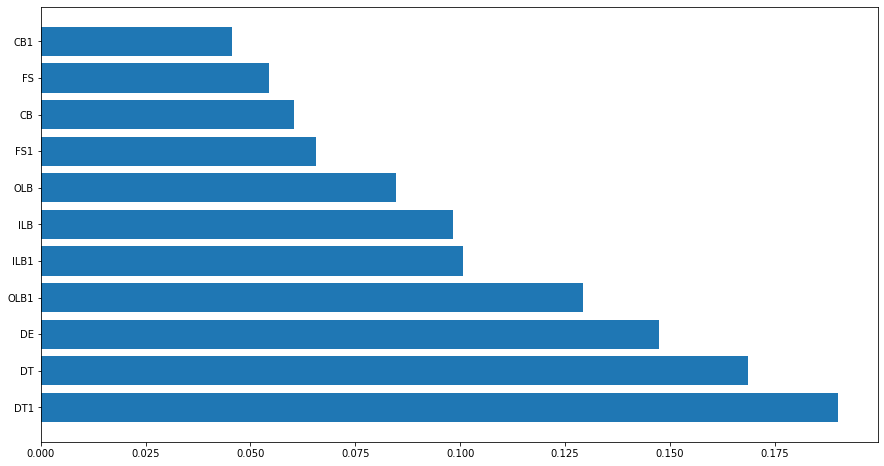

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(dff['officialPosition'], dff['pressureValue'])

colors = dict(zip([
'OLB','MLB','ILB','DE','SS','FS','CB','DT','NT',
'OLB1','OLB2','OLB3','OLB4','OLB5',
'MLB1','MLB2','MLB3','MLB4','MLB5',
'ILB1','ILB2','ILB3','ILB4','ILB5',
'DE1','DE2','DE3','DE4','DE5',
'SS1','SS2','SS3','SS4','SS5',
'FS1','FS2','FS3','FS4','FS5',
'CB1','CB2','CB3','CB4','CB5','CB6','CB7',
'DT1','DT2','DT3','DT4','DT5',
'NT1','NT2','NT3','NT4','NT5'],
['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
'#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',]
))

group_lk = df.set_index('displayName')['officialPosition'].to_dict()

Text(1, 0.4, '1')

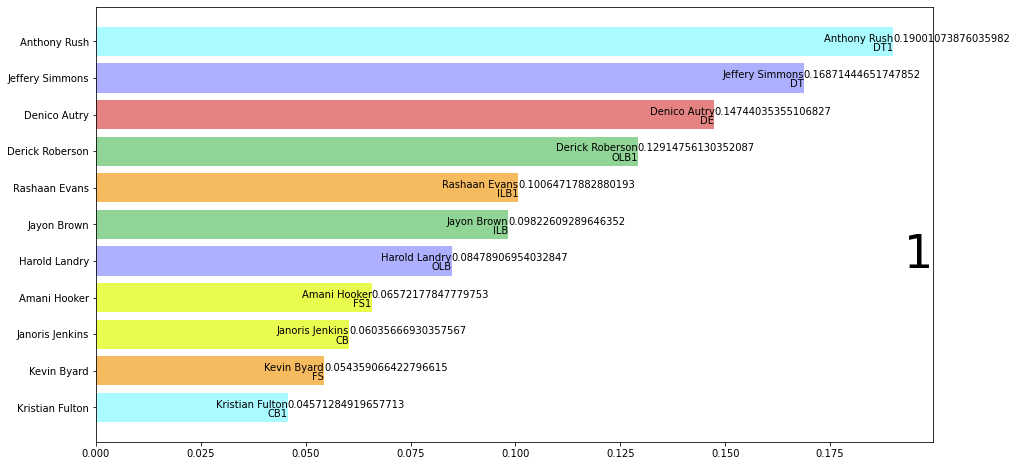

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
ax.barh(dff['displayName'], dff['pressureValue'], color=[colors[group_lk[x]] for x in dff['displayName']])

# pass colors values to `color=`

# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['pressureValue'], dff['displayName'])):
    ax.text(value, i,     name,            ha='right')  # Official Position: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Display Name: group name
    ax.text(value, i,     value,           ha='left')   # .175: Pressure Value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_frame, transform=ax.transAxes, size=46, ha='right')

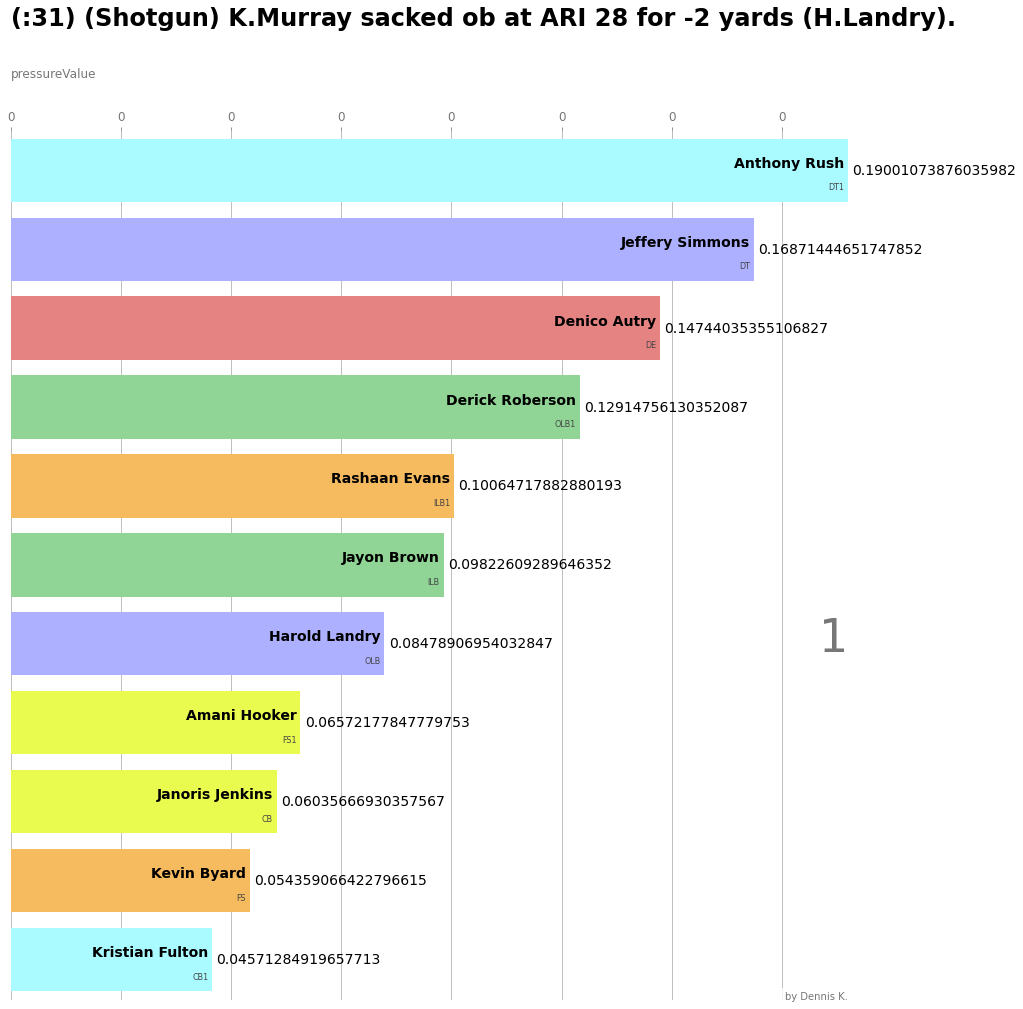

In [14]:
fig, ax = plt.subplots(figsize=(15, 16))

def draw_barchart(frame):
    dff = df[df['frameId'].eq(frame)].sort_values(by='pressureValue', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['displayName'], dff['pressureValue'], color=[colors[group_lk[x]] for x in dff['displayName']])
    dx = dff['pressureValue'].max() /200
    for i, (value, name) in enumerate(zip(dff['pressureValue'], dff['displayName'])):
        ax.text(value-dx, i,     name,           size=14, weight=800, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     value,  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, frame, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'pressureValue', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, f'{playDescription}',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Dennis K.', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(1)

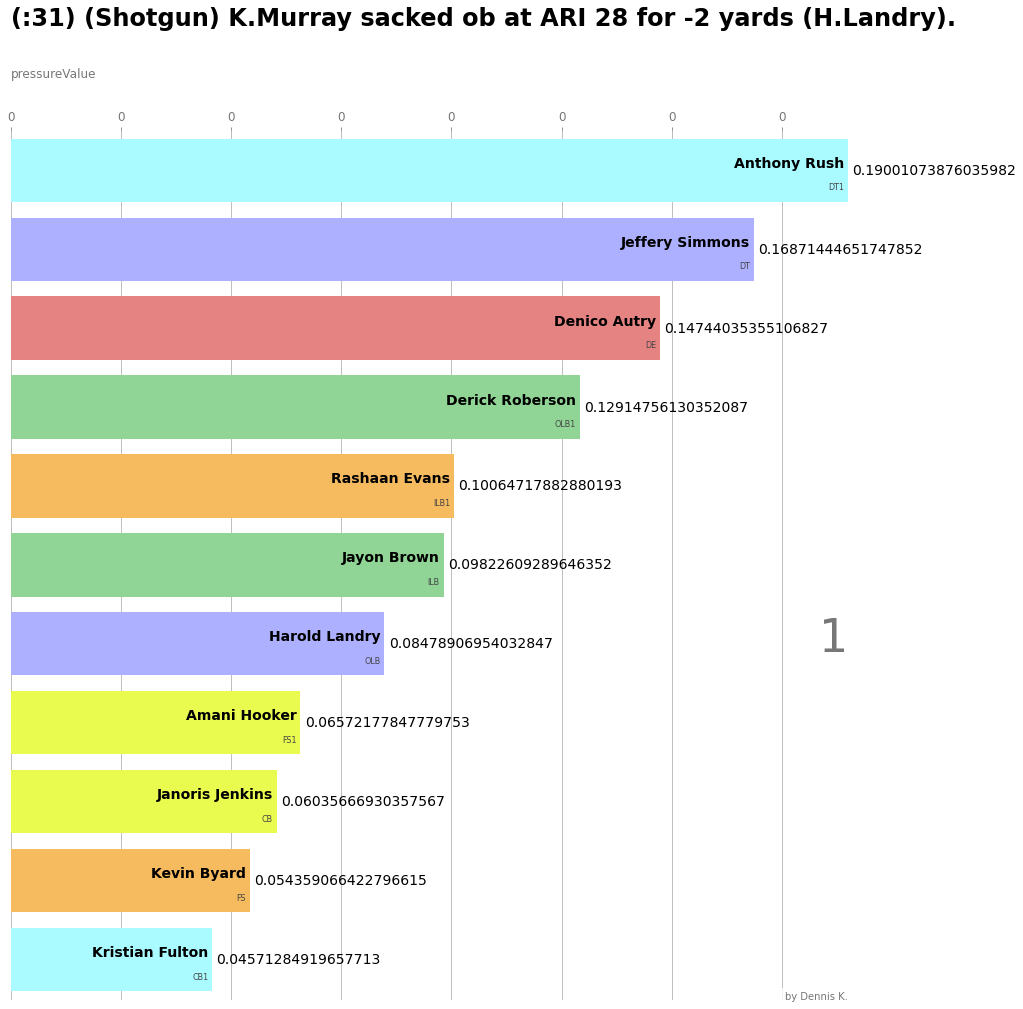

In [19]:
fig, ax = plt.subplots(figsize=(15, 16))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(frameMin, frameMax))
HTML(animator.to_jshtml()) 